Scale-Free Lab 6 (4-6)

B210900803 Э.Өлзиймаа



*Google Colab ашиглан код ажиллуулахын тулд дараах сангуудыг суулгана:*

`networkx - Сүлжээ (граф) үүсгэж, анализ хийх`

In [ ]:
pip install networkx

`powerlaw - Хүчин зүйлийн тархалтыг анализ хийх`

In [ ]:
pip install powerlaw

*Дараах код нь шаардлагатай сангуудыг татаж, импортлож байна:*

`networkx `нь графын онцлог, тогтолцооны олон төрлийг бүрэн дэмждэг бөгөөд эдгээрийг судлах, шинжлэх, асуудал шийдвэрлэхэд тохиромжтой хэрэгсэл юм.

*   List item
*   List item



In [ ]:
import networkx as nx

`warnings `нь тусламжтайгаар таны програмд илүү сайн хэрэглэгчийн мэдэгдэл гаргах, асуудлыг анхаарах боломжийг олгодог.

In [ ]:
import warnings

`pandas` нь өгөгдөлд гүнзгий анализ хийх, өөрчлөлт хийх, шүүлт хийх болон өгөгдлийн урсгалыг удирдах хялбар бөгөөд хүчирхэг хэрэгсэл юм.

In [ ]:
import pandas as pd

`numpy` нь өндөр хурдтай, өргөн хэрэглэгддэг, тоон өгөгдөлтэй ажиллах чадвартай бөгөөд шинжлэх ухаан, инженерчлэл, өгөгдлийн шинжилгээ болон машин суралцах зэрэг олон салбарт өргөнөөр ашиглагддаг.

In [ ]:
import numpy as np

`matplotlib.pyplot` нь график дүрслэл хийх, шинжилгээ хийхэд маш хэрэгтэй ба хэрвээ та өгөгдөлд визуалчлал хийх шаардлагатай бол энэ номын сан нь төгс шийдэл болдог.

In [ ]:
import matplotlib.pyplot as plt

`powerlaw` нь хүчний хуулийн тархалтуудыг нарийвчлан шинжлэх, мөн тэдгээрийг бодит өгөгдлүүдтэй хэрхэн тохирч байгааг шалгах маш хүчирхэг хэрэгсэл юм.

In [ ]:
import powerlaw

`%matplotlib inline `нь Jupyter Notebook-ийг илүү үр ашигтай хэрэглэж, графикуудыг шууд харах боломжийг олгодог тул өгөгдөл болон шинжилгээний графикуудтай ажиллахад маш тохиромжтой.

In [ ]:
%matplotlib inline

Графын оройн тархалтыг лог-лог (log-log) координатад харуулна.

Power-law тохируулалт хийж, альфа (α) болон сигма (σ) утгуудыг харуулна.

In [ ]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)  # Сүлжээг scipy-ийн цөөн хэмжээний матриц болгон хувиргах
    xmin = min([d[1] for d in G.degree()])  # Сүлжээгийн хамгийн бага хасах утга (degree)
    indegrees = M.sum(0).A[0]  # Матрицаас оролтын зэрэг (indegree)-ийг олох
    degree = np.bincount(indegrees)  # Өргөдлийн тоо (degree)-ийг тоолох
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')  # Эрсдэлтэй хуурамч хуулийн тохиргоо (power law fitting)

    fig = plt.figure(figsize=(16, 6))  # Шинэ зураг үүсгэх (зурагны хэмжээ 16x6 инч)

    """ Өргөдлийн түгээмэл байдлыг зурах """
    plt.subplot(1, 3, 1)  # Зурагны 1-р хэсэг
    plt.plot(range(len(degree)), degree, 'b.')  # Өргөдлийн түгээмэл байдал, цэнхэр өнгөтэй, цэгээр дүрслэх
    plt.loglog()  # Логарифм утгаар зурах
    plt.xlim((min(degree), max(degree)))  # X-аюулын хүрээ (хамгийн бага, хамгийн их утгууд)
    plt.xlabel('Degree')  # X тагийн тайлбар
    plt.ylabel('P(k)')  # Y тагийн тайлбар

    """ CDF (Cumulative Distribution Function) -ийг зурах """
    plt.subplot(1, 3, 2)  # Зурагны 2-р хэсэг
    fit.plot_cdf()  # CDF-г төслийг зурах
    plt.xlabel("Degree")  # X тагийн тайлбар
    plt.ylabel('CDF')  # Y тагийн тайлбар

    """ CCDF (Complementary Cumulative Distribution Function) -ийг зурах """
    plt.subplot(1, 3, 3)  # Зурагны 3-р хэсэг
    fit.power_law.plot_pdf(color='r', linestyle='--', label='fit ccdf')  # CCDF-г харуулж, хүчтэй хуулийн тохиргоог нэмэх
    fit.plot_ccdf()  # CCDF-г зурах
    plt.ylabel('CCDF')  # Y тагийн тайлбар
    plt.xlabel('Degree')  # X тагийн тайлбар
    plt.tight_layout()  # Хэсгүүдийг хооронд нь зохицуулах
    plt.show()  # Зургийг харуулах
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')  # Хүчтэй хуулийн параметрүүдийг хэвлэх (alpha болон sigma)


Энэ код нь Barabási–Albert (BA) граф үүсгэж, түүнийг дүрслэнэ.


Шинэ орой нь өмнө нь холбогдсон олон оройтой холбогдох магадлал өндөртэй байна.


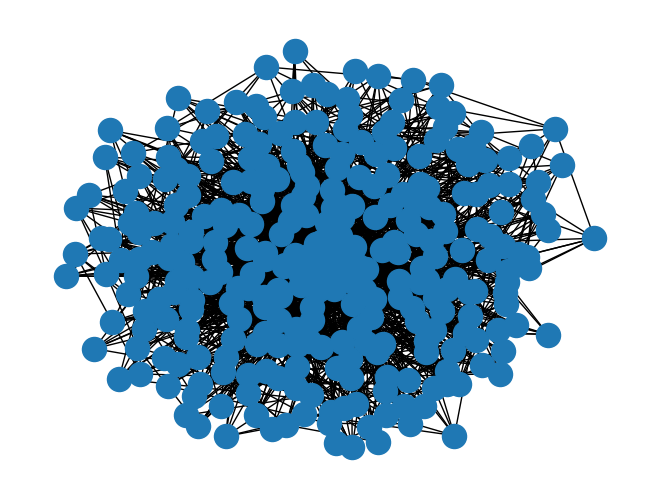

In [ ]:
m = 7 # number of links each node establishes once joining the network
ba = nx.barabasi_albert_graph(300, m)
nx.draw(ba)

In [ ]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)  # Сүлжээг scipy-ийн цөөн хэмжээний матриц болгон хувиргах
    xmin = min([d[1] for d in G.degree()])  # Сүлжээгийн хамгийн бага хасах утга (degree)
    indegrees = M.sum(0).A[0]  # Матрицаас оролтын зэрэг (indegree)-ийг олох
    degree = np.bincount(indegrees)  # Өргөдлийн тоо (degree)-ийг тоолох
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')  # Эрсдэлтэй хуурамч хуулийн тохиргоо (power law fitting)

    fig = plt.figure(figsize=(16, 6))  # Шинэ зураг үүсгэх (зурагны хэмжээ 16x6 инч)

    """ Өргөдлийн түгээмэл байдлыг зурах """
    plt.subplot(1, 3, 1)  # Зурагны 1-р хэсэг
    plt.plot(range(len(degree)), degree, 'b.')  # Өргөдлийн түгээмэл байдал, цэнхэр өнгөтэй, цэгээр дүрслэх
    plt.loglog()  # Логарифм утгаар зурах
    plt.xlim((min(degree), max(degree)))  # X-аюулын хүрээ (хамгийн бага, хамгийн их утгууд)
    plt.xlabel('Degree')  # X тагийн тайлбар
    plt.ylabel('P(k)')  # Y тагийн тайлбар

    """ CDF (Cumulative Distribution Function) -ийг зурах """
    plt.subplot(1, 3, 2)  # Зурагны 2-р хэсэг
    fit.plot_cdf()  # CDF-г төслийг зурах
    plt.xlabel("Degree")  # X тагийн тайлбар
    plt.ylabel('CDF')  # Y тагийн тайлбар

    """ CCDF (Complementary Cumulative Distribution Function) -ийг зурах """
    plt.subplot(1, 3, 3)  # Зурагны 3-р хэсэг
    fit.power_law.plot_pdf(color='r', linestyle='--', label='fit ccdf')  # CCDF-г харуулж, хүчтэй хуулийн тохиргоог нэмэх
    fit.plot_ccdf()  # CCDF-г зурах
    plt.ylabel('CCDF')  # Y тагийн тайлбар
    plt.xlabel('Degree')  # X тагийн тайлбар
    plt.tight_layout()  # Хэсгүүдийг хооронд нь зохицуулах
    plt.show()  # Зургийг харуулах
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')  # Хүчтэй хуулийн параметрүүдийг хэвлэх (alpha болон sigma)


*Графын шинж чанаруудыг тооцоолох нь:*

Дундаж замын урт – Нэг оройгоос нөгөө орой хүртэлх хамгийн богино замын дундаж.


Графын радиус – Графын төвөөс хамгийн ойр орших оройн хамгийн урт зам.


Графын диаметр – Графын хамгийн хол орших хоёр оройн хоорондох хамгийн урт зам.


Дундаж оройн зэрэг – Нийт оройн зэргийг тоолж, дунджаар гаргах.

In [ ]:
# Дундаж замын урт
average_shortest_path_length = nx.average_shortest_path_length(ba)
print(f"Дундаж замын урт: {average_shortest_path_length}")

# Графын радиус
radius = nx.radius(ba)
print(f"Графын радиус: {radius}")

# Графын диаметр
diameter = nx.diameter(ba)
print(f"Графын диаметр: {diameter}")

# Дундаж зангилааны зэрэг
average_degree = np.mean([d for n, d in ba.degree()])
print(f"Дундаж оройн зэрэг: {average_degree}")


Дундаж замын урт: 2.395540691192865
Графын радиус: 3
Графын диаметр: 4
Дундаж оройн зэрэг: 13.673333333333334


**BA загварын өөр хувилбаруудыг шалгах**

`*Хоёр өөр төрөлтэй холболттой BA загвар*`


50% нь m=5 зангилаатай холбогдоно,

50% нь m=10 зангилаатай холбогдоно.

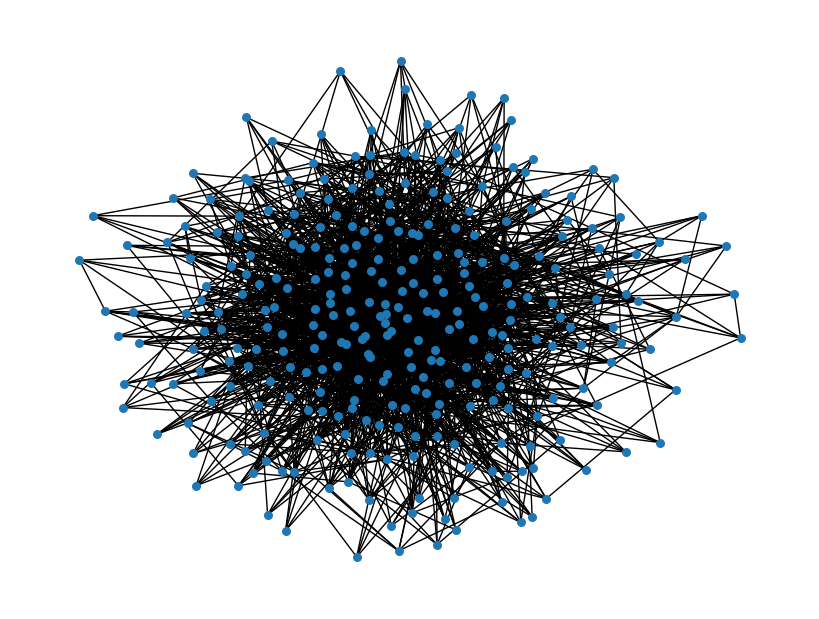

In [ ]:
dual_ba = nx.dual_barabasi_albert_graph(300, 5, 10, 0.5)  # 300 уулзвартай, 5 холболттой, 10 уулзвараас эхлэн сүлжээ үүсгэх
plt.figure(figsize=(8, 6))  # Зургийн хэмжээг 8x6 инч болгож тохируулах
nx.draw(dual_ba, node_size=30)  # Графыг зурж, уулзваруудын хэмжээг 30 пиксел болгох
plt.show()  # Зургаа дэлгэц дээр харуулах

BA загварыг өргөтгөж, нэмэлт оройн холболтын магадлалтай загвар.

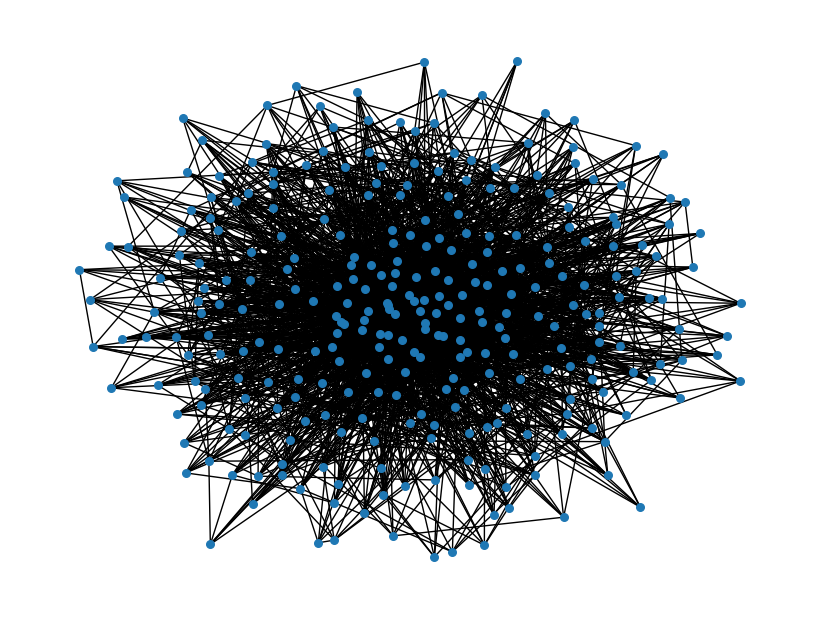

In [ ]:
extended_ba = nx.extended_barabasi_albert_graph(300, 7, 0.2, 0.3)  # 300 уулзвартай, 7 холболттой, 0.2 ба 0.3 параметртэй өргөтгөсөн Barabási-Albert граф үүсгэх
plt.figure(figsize=(8, 6))  # Зургийн хэмжээг 8x6 инч болгож тохируулах
nx.draw(extended_ba, node_size=30)  # Графыг зурж, уулзваруудын хэмжээг 30 пиксел болгох
plt.show()  # Зургаа дэлгэц дээр харуулах

**Holme and Kim загварыг хэрэгжүүлэх**

Төгсгөлөг кластержилттэй BA загвар

p=0.3 нь санамсаргүй холболтын магадлалыг тодорхойлно.

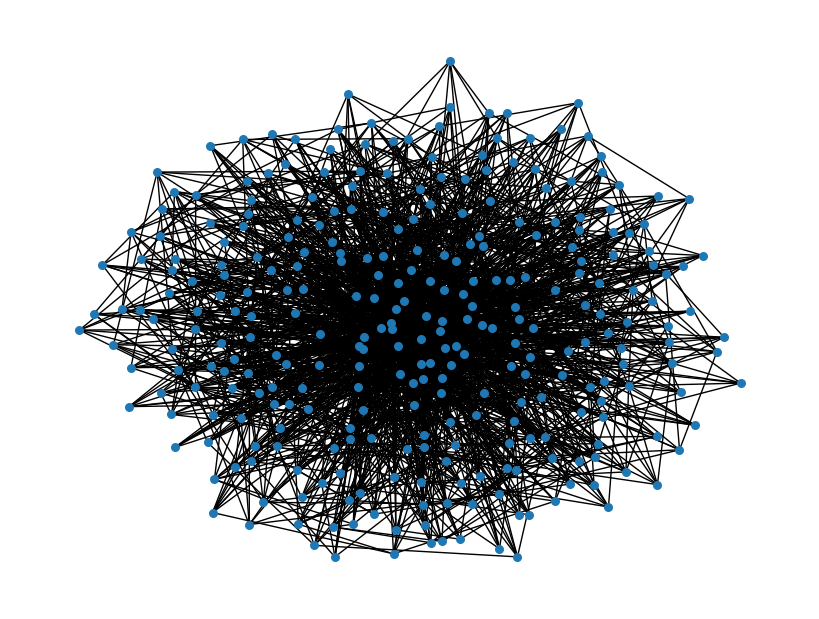

In [ ]:
hk_graph = nx.powerlaw_cluster_graph(300, 7, 0.3)  # 300 уулзвартай, 7 холболттой, 0.3 кластержилтын магадлалтай power law кластер граф үүсгэх
plt.figure(figsize=(8, 6))  # Зургийн хэмжээг 8x6 инч болгож тохируулах
nx.draw(hk_graph, node_size=30)  # Графыг зурж, уулзваруудын хэмжээг 30 пиксел болгох
plt.show()  # Зургаа дэлгэц дээр харуулах

**Бодлого**

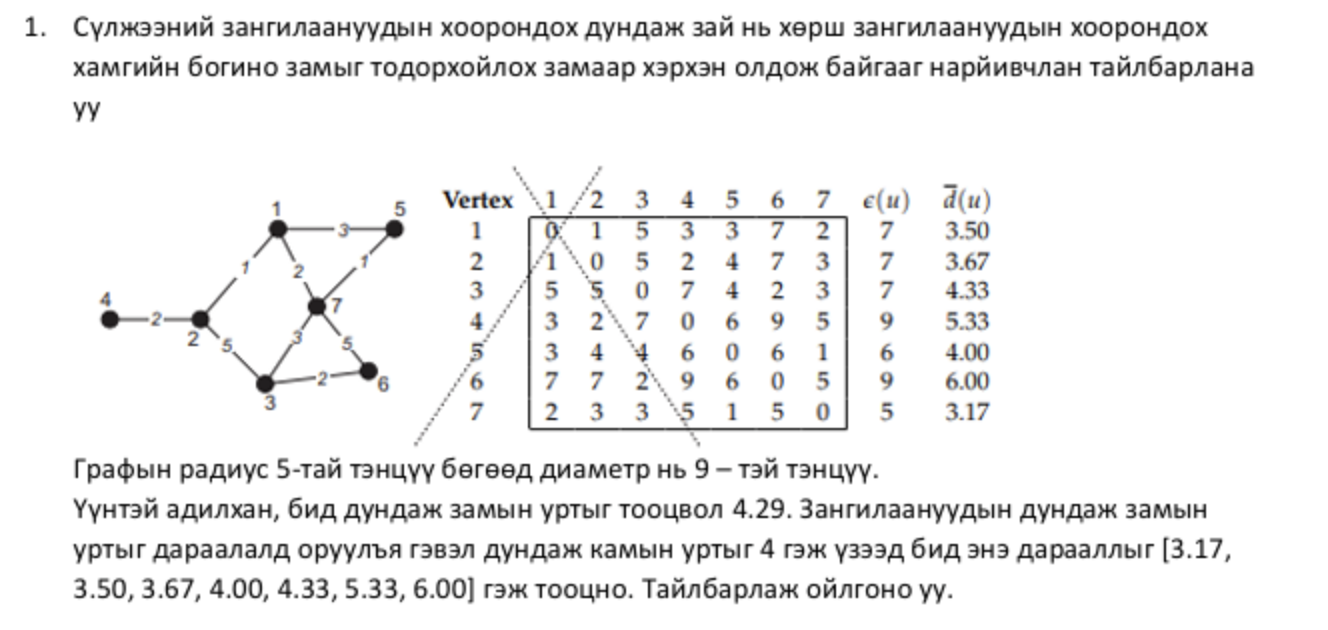

**Scale-free сүлжээнд богино замыг олохын тулд hubs буюу өндөр холболттой зангилаануудыг ашиглах хэрэгтэй**

1. Зангилааны холболтын зэрэг (degree) тооцох

2. Өндөр холболттой зангилаануудыг (hub) тодорхойлох

3. Shortest Path тооцохдоо hubs-ийг түлхүү ашиглах

4. Дундаж замын урт, диаметр тооцох

In [ ]:
import networkx as nx
import numpy as np

# Графын ирмэгүүдийг тодорхойлох
edges = [(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7), (4, 5), (6, 7), (5, 7)]

# Граф үүсгэх
G = nx.Graph()
G.add_edges_from(edges)

# Зангилааны холболтын зэрэг (degree) тооцох
degree_dict = dict(G.degree())

# Hubs тодорхойлох (degree > дундаж)
avg_degree = np.mean(list(degree_dict.values()))
hubs = [node for node, deg in degree_dict.items() if deg > avg_degree]

# Бүх хосуудын хоорондох богино замын уртыг тооцох
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

# Дундаж замын урт тооцох
all_lengths = [shortest_paths[u][v] for u in G.nodes for v in G.nodes if u != v]
avg_shortest_path = np.mean(all_lengths)

# Графын диаметр тодорхойлох
diameter = nx.diameter(G)

# Үр дүнг харуулах
avg_degree, hubs, avg_shortest_path, diameter

(2.5714285714285716, [2, 3, 5, 7], 1.7142857142857142, 3)

**Scale-free сүлжээгээр бодохын тулд бид дараах алхмуудыг дагана:**

1. Scale-Free Сүлжээний Шинж:
Scale-free сүлжээ нь degree distribution нь power law дагадаг (P(k) ~ k^(-γ), ихэвчлэн γ ≈ 2~3).
Өндөр холболттой hub зангилаанууд байдаг.

2. Графын Онцлогийг Шалгах:
Тухайн граф scale-free шинжтэй эсэхийг шалгахын тулд зангилааны холболтын тархалтыг (degree distribution) судлах шаардлагатай.

Хэрэв зангилаануудын ихэнх нь цөөн холбоостой, харин зарим нь олон холбоостой байвал scale-free магадлалтай.

3. Shortest Path Бодохдоо Hub-уудыг Ашиглах:
Scale-free графуудын хувьд мэдээлэл ихэнхдээ hub-ууд дамжин хамгийн богино замаар түгдэг.

Тиймээс бид зангилаануудын холболтын зэрэг (degree) дээр тулгуурлан богино замыг тооцох хэрэгтэй.

4. Алгоритм Хэрэгжүүлэх:
Dijkstra буюу Floyd-Warshall алгоритмуудыг ашиглан богино замыг тооцно.

Харин hub-уудыг priority өгөх замаар замын уртыг тооцвол scale-free шинжийг илүү бодитой тусгана.

5. Дундаж Замын Урт ба Диаметр:
Дундаж замын уртыг тооцоход hub-уудын оролцоог харгалзан үзнэ.

Scale-free графын хувьд дундаж замын урт ихэвчлэн log(N) / log(log(N)) хэлбэртэй байдаг.

**Дүгнэлт**

*Scale-Free сүлжээний онцлог* – Ихэнх орой бага зэрэгтэй, харин цөөн орой өндөр зэрэгтэй байдаг.

*Power-law шинжилгээ* – Сүлжээ нь power-law тархалтыг дагаж буйг шалгав.

Дасгалуудыг гүйцэтгэж dual_barabasi_albert_graph(), extended_barabasi_albert_graph(), powerlaw_cluster_graph() хэрэгжүүлсэн.

Бага утгатай зангилаанууд (графикийн төв рүү ойр): Тэд бусад бүх зангилаа руу хүрэх дундаж хамгийн богино зам багатай, сайн холбогдсон гэсэн үг.
Илүү өндөр утгатай зангилаанууд (захын хэсэгт ойр): Тэд хамгийн урт замтай, өөрөөр хэлбэл тэд илүү хол эсвэл бага холбогдсон байна.
Хамгийн богино зам ба наранд түлэгдэх аналогийг ойлгох нь:
"Наранд шарах" гэсэн нэр томъёо нь хамгийн богино замуудын хувьд хамгийн нөлөө бүхий буюу төв зангилааг тодорхойлох үйл явцыг илэрхийлж болно. Хэрэв зангилаа нь жижиг дундаж хамгийн богино замтай бол түүнийг холболтын төв гэж үзэж болно. Энэ санаа нь мэдээлэл эсвэл урсгал сүлжээгээр хэр үр дүнтэй хөдөлж байгааг шинжлэх явдал юм.
